# Рухадзе Александр БМБ-177 - Задание по датасету IBM HR Analytics Employee Attrition

# Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Загрузим наш датасет IBM HR Analytics Employee Attrition

In [2]:
data = pd.read_csv('C:\Rukhadze_Alexander_HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Посмотрим, есть ли в нашем датасете пропуски

In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Удивительно, но пропусков в датасете нет, и это радует, т.к. не придется тогда их заполнять

В датасете очень много признаков (больше 30), и, на самом деле, среди них есть ненужные, которые можно убрать, например, точно лишние следующие столбцы:
- EmployeeCount (ничего толком не показывает);
- EmployeeNumber (ничего толком и не показывает); 
- StandardHours (т.к. у всех работников этот показатель одинаковый)

Остальные признаки, полагаю, можно оставить - они либо очень важные, либо не требуют много обработки, поэтому их можно не убирать из датасета

Теперь проверим работников по возрасту: скольким из них больше или меньше 18 лет:

In [4]:
over18 = int(data.loc[:,['Over18']][data['Over18'] == 'Y'].count())
print('Число работников старше 18 лет', over18)

Число работников старше 18 лет 1470


Получается, что все работники старше 18 лет, поэтому мы можем убрать и столбец Over18, т.к. никакой дополнительной важной информации он нам не дает

Следовательно, в датасете остаются следующие признаки:
- Attrition - наша целевая переменная, ушел или нет работник,
- Age - возраст работника, численная переменная,
- BusinessTravel - часто ли ездит работник в командировки, категориальная переменная,
- DailyRate - дневная ставка работника, численная переменная,
- Department - подразделение работника, категориальная переменная,
- DistanceFromHome - удаленность места работы от дома, это численная переменная,
- Education - степень образования, в датасете это численная переменная,
- EducationField - программа образования (на кого учился работник), категориальная переменная,
- EnvironmentSatisfaction - удовлетворенность средой организации, в датасете это численная переменная,
- Gender - пол работника, категориальная переменная,
- HourlyRate - часовая ставка работника, численная переменная,
- JobInvolvement - вовлеченность в работу, численная переменная,
- JobLevel - уровень работы, численная переменная,
- JobRole - должность работника, категориальная переменная,
- JobSatisfaction - удовлетворенность работой, численная переменная,
- MaritalStatus - семейный статус, категориальная переменная,
- MonthlyIncome - ежемесячный доход, численная переменная,
- MonthlyRate - месячная ставка, численная переменная,
- NumCompaniesWorked - количество организаций, в которых работал работник, численная переменная,
- OverTime - есть ли сверхурочная работа, категориальная переменная,
- PercentSalaryHike - процентная надбавка к зарплате, численная переменная,
- PerformanceRating - рейтинг производительности труда работника, численная переменная,
- RelationshipSatisfaction - удовлетворенность отношениями и коммуникацией, численная переменная,
- StockOptionLevel - численная переменная,
- TotalWorkingYears - общее количество рабочих часов, численная переменная,
- TrainingTimesLastYear - количество часов обучения и подготовки, численная переменная,
- WorkLifeBalance - соотношение между работой и личной жизнью, численная переменная,
- YearsAtCompany - количество лет в компании, численная переменная,
- YearsInCurrentRole - количество лет на занимаемой должности, численная переменная,
- YearsSinceLastPromotion - количество лет с прошлого повышения по должности, численная переменная,
- YearsWithCurrManager - количество лет работы с нынешним менеджером, численная переменная.

In [5]:
data.drop(['EmployeeCount'], axis=1, inplace=True)
data.drop(['EmployeeNumber'], axis=1, inplace=True)
data.drop(['StandardHours'], axis=1, inplace=True)
data.drop(['Over18'], axis=1, inplace=True)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,3,2,2,17,3,2,7,7,7,7


Лишние столбцы мы убрали, теперь можно идти дальше.

Теперь перейдем к кодированию переменных и для этого будем смотреть, какое у нас количество уникальных значений у категориальных переменных: 

In [6]:
len(data['BusinessTravel'].unique())

3

In [7]:
dummies = pd.get_dummies(data['BusinessTravel'], prefix='Business', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['BusinessTravel'], axis=1, inplace=True)

In [8]:
len(data['Department'].unique())

3

In [9]:
dummies = pd.get_dummies(data['Department'], prefix='Department', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['Department'], axis=1, inplace=True)

In [10]:
len(data['EducationField'].unique())

6

In [11]:
dummies = pd.get_dummies(data['EducationField'], prefix='EducationField', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['EducationField'], axis=1, inplace=True)

In [12]:
len(data['JobRole'].unique())

9

In [13]:
dummies = pd.get_dummies(data['JobRole'], prefix='JobRole', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['JobRole'], axis=1, inplace=True)

In [14]:
len(data['MaritalStatus'].unique())

3

In [15]:
dummies = pd.get_dummies(data['MaritalStatus'], prefix='MaritalStatus', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['MaritalStatus'], axis=1, inplace=True)

In [16]:
len(data['OverTime'].unique())

2

In [17]:
dummies = pd.get_dummies(data['OverTime'], prefix='OverTime', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['OverTime'], axis=1, inplace=True)

In [18]:
len(data['Gender'].unique())

2

In [19]:
dummies = pd.get_dummies(data['Gender'], prefix='Gender', drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(['Gender'], axis=1, inplace=True)

Заодно перекодируем нашу целевую переменную - ушел человек или нет. Пусть ушедшие будут 1 (единичками), а оставшиеся будут 0 (ноликами)

In [20]:
data.Attrition  = data.Attrition.map({"Yes":1, 'No':0})

Теперь посмотрим на наш окончательный датасет:

In [21]:
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Gender_Male
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,1,0,0,1,1,0
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,1,0,0,1,0,0,1
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,1,0,0,1,0,1,0
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,0,1
5,32,0,1005,2,2,4,79,3,1,4,...,0,0,0,0,0,0,0,1,0,1
6,59,0,1324,3,3,3,81,4,1,1,...,0,0,0,0,0,0,1,0,1,0
7,30,0,1358,24,1,4,67,3,1,3,...,0,0,0,0,0,0,0,0,0,1
8,38,0,216,23,3,4,44,2,3,3,...,0,1,0,0,0,0,0,1,0,1
9,36,0,1299,27,3,3,94,3,2,3,...,0,0,0,0,0,0,1,0,0,1


# Разбиение выборки

Для начала нужно разбить нашу выборку на обучающую и тестовую выборку.

In [22]:
y = data['Attrition'].values
X = data.drop('Attrition',axis=1).values
X.shape, y.shape

((1470, 44), (1470,))

In [23]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3)

y_train = data_train['Attrition']
y_test = data_test['Attrition']

X_train = data_train.drop(['Attrition'], axis=1)
X_test = data_test.drop(['Attrition'], axis=1)

Теперь перейдем к построению моделей.

# Моделирование (модель логистической регрессии)

In [24]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit.predict_proba(X_test)
logit.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1,

In [25]:
logit_predicted = logit.predict (X_test)
logit_proba = logit.predict_proba (X_test)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
print('Accuracy =', accuracy_score(y_test, logit_predicted))
print('Precision =', precision_score(y_test, logit_predicted))
print('Recall =', recall_score(y_test, logit_predicted))
print('F1_score =', f1_score(y_test, logit_predicted))
print('AUC =', roc_auc_score(y_test, logit_proba[:,1]))

Accuracy = 0.863945578231
Precision = 0.647058823529
Recall = 0.314285714286
F1_score = 0.423076923077
AUC = 0.806931074317


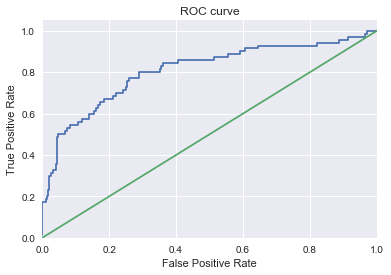

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, logit_proba[:,1])
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

# Моделирование (модель случайного леса)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
y_proba = rfc.predict_proba(X_test)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

Accuracy = 0.84126984127
Precision = 0.5
Recall = 0.114285714286
F1_score = 0.186046511628
AUC = 0.693068925683


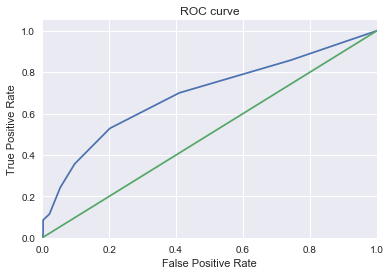

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Кстати, получилось, что более качественный классификатор - это модель логистической регрессии, т.к. площадь под кривой AUC оказалась больше, чем в случае использования модели случайного леса

Теперь также можно определить, какие из признаков были наиболее важными.

In [31]:
featureImportance = pd.DataFrame({"feature": data.drop('Attrition',axis=1).columns, 
                                  "importance": rfc.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance

,importance
feature,
Age,0.073698
DailyRate,0.067198
MonthlyIncome,0.067149
TotalWorkingYears,0.062009
MonthlyRate,0.053916
OverTime_Yes,0.044381
HourlyRate,0.041511
YearsAtCompany,0.040868
DistanceFromHome,0.039000


Удобнее представить эту таблицу в виде столбиковой диаграммы для наглядности:

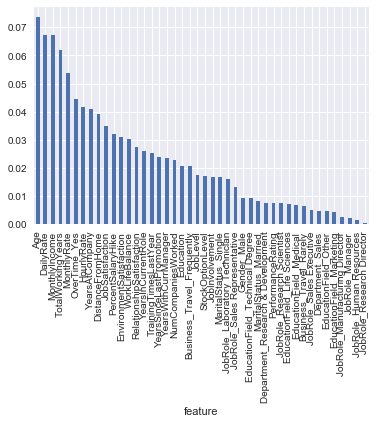

In [32]:
featureImportance["importance"].plot('bar');

Теперь найдем оптимальное число деревьев в лесу при помощи GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':range(5, 100), 'weights':['uniform', 'distance']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, parameters)
clf.fit(X_train, y_train)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='distance')

In [34]:
y_proba = clf.predict_proba(X_test)[:,1]
print('AUC =', roc_auc_score(y_test, y_proba))

AUC = 0.579976896419


In [36]:
parameters = {
              'n_estimators': [10,20,30,50,70,100],
              'min_samples_leaf': [1, 3, 5, 7, 10],
             } 
rfc = RandomForestClassifier(random_state=42)

gcv = GridSearchCV(rfc, parameters, n_jobs= -1)
gcv.fit(X_train, y_train)
gcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [37]:
y_predicted = gcv.predict(X_test)
y_proba = gcv.predict_proba(X_test)

In [38]:
y_proba = gcv.predict_proba(X_test)[:, 1]
print('AUC =', roc_auc_score(y_test, y_proba))

AUC = 0.759029649596


Нам удалось значительно улучшить качество модели - после найденного оптимального числа деревьев в лесу значение AUC значительно выросло.